In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

n = 800

slow_rep = pd.read_csv("M40_T60_K16.csv").fillna(0)
balanced_rep = pd.read_csv("M20_T30_K8.csv").fillna(0)
fast_rep = pd.read_csv("M10_T15_K4.csv").fillna(0)

slow_rep = slow_rep[slow_rep["type"] == "scalar"]
slow_rep_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [slow_rep.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    slow_rep_temp = pd.concat([slow_rep[slow_rep.module == string], temp], axis=1).reset_index().value
    slow_rep_Qi[string] = slow_rep_temp

balanced_rep = balanced_rep[balanced_rep["type"] == "scalar"]
balanced_rep_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [balanced_rep.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    balanced_rep_temp = pd.concat([balanced_rep[balanced_rep.module == string], temp], axis=1).reset_index().value
    balanced_rep_Qi[string] = balanced_rep_temp

fast_rep = fast_rep[fast_rep["type"] == "scalar"]
fast_rep_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [fast_rep.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    fast_rep_temp = pd.concat([fast_rep[fast_rep.module == string], temp], axis=1).reset_index().value
    fast_rep_Qi[string] = fast_rep_temp

In [2]:
x_quick = pd.DataFrame([
    ['Slow', 'Q0', slow_rep_Qi["SuperMarket.checkout.queues[0]"].mean(), slow_rep_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Slow', 'Q1', slow_rep_Qi["SuperMarket.checkout.queues[1]"].mean(), slow_rep_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Balanced', 'Q0', balanced_rep_Qi["SuperMarket.checkout.queues[0]"].mean(), balanced_rep_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Balanced', 'Q1', balanced_rep_Qi["SuperMarket.checkout.queues[1]"].mean(), balanced_rep_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Fast', 'Q0', fast_rep_Qi["SuperMarket.checkout.queues[0]"].mean(), fast_rep_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Fast', 'Q1', fast_rep_Qi["SuperMarket.checkout.queues[1]"].mean(), fast_rep_Qi["SuperMarket.checkout.queues[1]"].std()],
], columns=['Speed', 'Queue', 'Mean Waiting Time (s)', 'SD'])

# Calcola gli intervalli di confidenza al 95%
ci_quick = 1.96 * (x_quick['SD'] / (math.sqrt(n)))

In [3]:
#for idx, row in x_quick.iterrows():
#    print(str(row["Mean Waiting Time (s)"] - 1.96*row.SD/math.sqrt(n)) + " - " + str(row["Mean Waiting Time (s)"] + 1.96*row.SD/math.sqrt(n)))

In [4]:
x_normal = pd.DataFrame([
    ['Slow', 'Q2', slow_rep_Qi["SuperMarket.checkout.queues[2]"].mean(), slow_rep_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Slow', 'Q3', slow_rep_Qi["SuperMarket.checkout.queues[3]"].mean(), slow_rep_Qi["SuperMarket.checkout.queues[3]"].std()],
    ['Balanced', 'Q2', balanced_rep_Qi["SuperMarket.checkout.queues[2]"].mean(), balanced_rep_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Balanced', 'Q3', balanced_rep_Qi["SuperMarket.checkout.queues[3]"].mean(), balanced_rep_Qi["SuperMarket.checkout.queues[3]"].std()],
    ['Fast', 'Q2', fast_rep_Qi["SuperMarket.checkout.queues[2]"].mean(), fast_rep_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Fast', 'Q3', fast_rep_Qi["SuperMarket.checkout.queues[3]"].mean(), fast_rep_Qi["SuperMarket.checkout.queues[3]"].std()],
], columns=['Speed', 'Queue', 'Mean Waiting Time (s)', 'SD'])

# Calcola gli intervalli di confidenza al 95%
ci_normal = 1.96 * (x_normal['SD'] / (math.sqrt(n)))

In [5]:
#for idx, row in x_normal.iterrows():
#    print(str(row["Mean Waiting Time (s)"] - 1.96*row.SD/math.sqrt(n)) + " - " + str(row["Mean Waiting Time (s)"] + 1.96*row.SD/math.sqrt(n)))

In [6]:
x_quick

,Speed,Queue,Mean Waiting Time (s),SD
0,Slow,Q0,1.905107,0.286109
1,Slow,Q1,0.872679,2.087229
2,Balanced,Q0,1.012441,0.103617
3,Balanced,Q1,0.508244,0.729439
4,Fast,Q0,0.565090,0.039310
5,Fast,Q1,0.294218,0.246594


In [7]:
((1.96 * 0.233714) / (0.329617 * 0.05))**2 #using X_bar and S found with n = 40

772.5425097558613

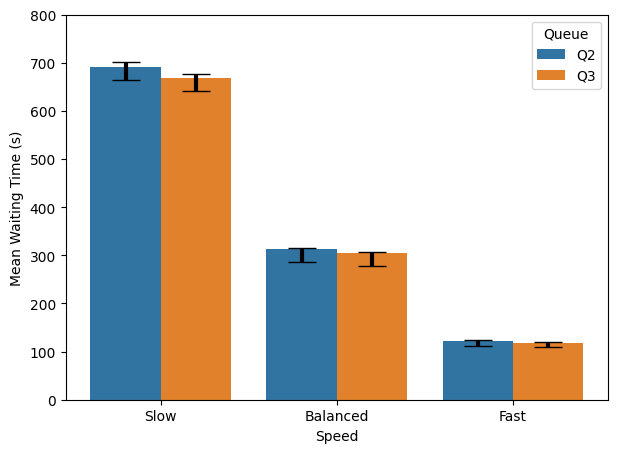

In [8]:
import seaborn as sns
plt.figure(figsize=(7, 5))
num_hues = len(np.unique(x_normal['Queue']))
ax = sns.barplot(data=x_normal, x='Speed', y='Mean Waiting Time (s)', hue='Queue')
ax.set_ylim(0, 800)
for (hue, df_hue), dogde_dist in zip(x_normal.groupby('Queue'), np.linspace(-0.4, 0.4, 2 * num_hues + 1)[1::2]):
    bars = ax.errorbar(data=df_hue, x='Speed', y='Mean Waiting Time (s)', yerr='SD', ls='', lw=3, color='black')
    xys = bars.lines[0].get_xydata()
    bars.remove()
    ax.errorbar(data=df_hue, x=xys[:, 0] + dogde_dist, y='Mean Waiting Time (s)', yerr=np.array(ci_normal).reshape(2, 3), ls='', lw=3, color='black', capsize=10)
plt.show()

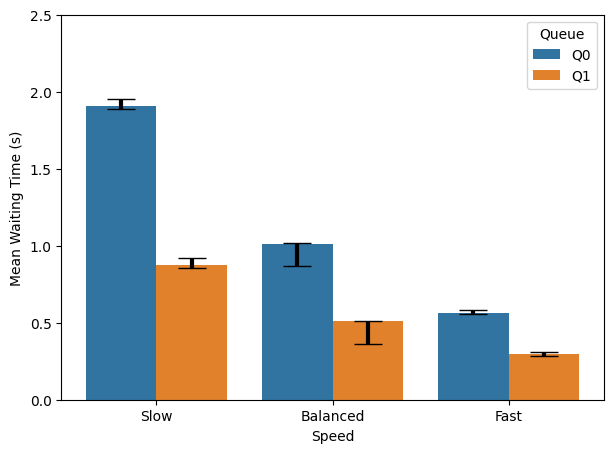

In [9]:
plt.figure(figsize=(7, 5))
num_hues = len(np.unique(x_quick['Queue']))
ax = sns.barplot(data=x_quick, x='Speed', y='Mean Waiting Time (s)', hue='Queue')
ax.set_ylim(0, 2.5)
for (hue, df_hue), dogde_dist in zip(x_quick.groupby('Queue'), np.linspace(-0.4, 0.4, 2 * num_hues + 1)[1::2]):
    bars = ax.errorbar(data=df_hue, x='Speed', y='Mean Waiting Time (s)', yerr='SD', ls='', lw=3, color='black')
    xys = bars.lines[0].get_xydata()
    bars.remove()
    ax.errorbar(data=df_hue, x=xys[:, 0] + dogde_dist, y='Mean Waiting Time (s)', yerr=np.array(ci_quick).reshape(2, 3), ls='', lw=3, color='black', capsize=10)
plt.show()

In [10]:
n=100

k0 = pd.read_csv("K0.csv")
k0 = k0[k0["type"] == "scalar"].fillna(0)
k0_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [k0.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    k0_temp = pd.concat([k0[k0.module == string], temp], axis=1).reset_index().value
    k0_Qi[string] = k0_temp

In [11]:
xk0 = pd.DataFrame({
    #'Run': [i for i in range(1, 201)], 
    'Q0': k0_Qi["SuperMarket.checkout.queues[0]"],
    'Q1': k0_Qi["SuperMarket.checkout.queues[1]"],
    'Q2': k0_Qi["SuperMarket.checkout.queues[2]"],
    'Q3': k0_Qi["SuperMarket.checkout.queues[3]"]
})

In [12]:
#plt.figure(figsize=(17, 5))
#sns.lineplot(x='Run', y='value', hue='variable', 
#             data=pd.melt(x, ['Run']))

In [13]:
#plt.figure(figsize=(10, 10))
#sns.violinplot(data=xk0, orient="h")

In [14]:
xk0.describe()

,Q0,Q1,Q2,Q3
count,100.0,100.0,100.000000,100.000000
mean,0.0,0.0,11.387504,10.904540
std,0.0,0.0,7.779400,7.766977
min,0.0,0.0,3.669351,3.253171
25%,0.0,0.0,6.854489,6.380733
50%,0.0,0.0,8.751074,8.283380
75%,0.0,0.0,14.071212,13.505446
max,0.0,0.0,58.978491,58.407690


In [15]:
k1000 = pd.read_csv("K1000.csv")
k1000 = k1000[k1000["type"] == "scalar"].fillna(0)
k1000_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [k1000.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    k1000_temp = pd.concat([k1000[k1000.module == string], temp], axis=1).reset_index().value
    k1000_Qi[string] = k1000_temp

xk1000 = pd.DataFrame({
    'Q0': k1000_Qi["SuperMarket.checkout.queues[0]"],
    'Q1': k1000_Qi["SuperMarket.checkout.queues[1]"],
    'Q2': k1000_Qi["SuperMarket.checkout.queues[2]"],
    'Q3': k1000_Qi["SuperMarket.checkout.queues[3]"]
})

xk1000.describe()

,Q0,Q1,Q2,Q3
count,100.000000,100.000000,100.0,100.0
mean,11.967247,11.488362,0.0,0.0
std,8.174713,8.166176,0.0,0.0
min,3.898102,3.449344,0.0,0.0
25%,7.127670,6.727117,0.0,0.0
50%,9.076859,8.627053,0.0,0.0
75%,14.564138,14.147137,0.0,0.0
max,61.806950,61.331268,0.0,0.0


In [16]:
p0 = pd.read_csv("p0.csv")
p0 = p0[p0["type"] == "scalar"].fillna(0)
p0_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [p0.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    p0_temp = pd.concat([p0[p0.module == string], temp], axis=1).reset_index().value
    p0_Qi[string] = p0_temp

xp0 = pd.DataFrame({
    'Q0': p0_Qi["SuperMarket.checkout.queues[0]"],
    'Q1': p0_Qi["SuperMarket.checkout.queues[1]"],
    'Q2': p0_Qi["SuperMarket.checkout.queues[2]"],
    'Q3': p0_Qi["SuperMarket.checkout.queues[3]"]
})

xp0.describe()

,Q0,Q1,Q2,Q3
count,100.000000,100.000000,100.000000,100.000000
mean,0.662119,0.360951,0.157701,0.048811
std,0.023323,0.020415,0.016626,0.012112
min,0.606218,0.321298,0.116701,0.025712
25%,0.647241,0.346507,0.144753,0.040475
50%,0.661454,0.360411,0.158601,0.047344
75%,0.678539,0.373402,0.168998,0.055662
max,0.743842,0.422401,0.211237,0.090056


In [17]:
p1 = pd.read_csv("p1.csv")
p1 = p1[p1["type"] == "scalar"].fillna(0)
p1_Qi = dict()
for i in range(4):
    temp = pd.DataFrame()
    temp['valori'] = [p1.value.values[j * 4 + i] for j in range(n)]
    string = f"SuperMarket.checkout.queues[{i}]"
    p1_temp = pd.concat([p1[p1.module == string], temp], axis=1).reset_index().value
    p1_Qi[string] = p1_temp

xp1 = pd.DataFrame({
    'Q0': p1_Qi["SuperMarket.checkout.queues[0]"],
    'Q1': p1_Qi["SuperMarket.checkout.queues[1]"],
    'Q2': p1_Qi["SuperMarket.checkout.queues[2]"],
    'Q3': p1_Qi["SuperMarket.checkout.queues[3]"]
})

xp1.describe()

,Q0,Q1,Q2,Q3
count,100.000000,100.000000,100.000000,100.000000
mean,0.596787,0.361584,0.159639,0.049551
std,0.019602,0.019677,0.017787,0.011291
min,0.554795,0.325698,0.115980,0.029459
25%,0.586068,0.347516,0.147520,0.042457
50%,0.594027,0.359014,0.161513,0.049029
75%,0.609403,0.377654,0.170046,0.055205
max,0.669597,0.410033,0.215948,0.078867


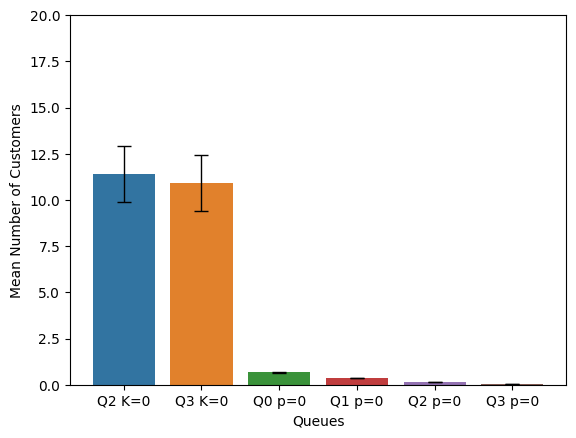

In [18]:
xk0p0 = pd.DataFrame([
    ['Q2 K=0', k0_Qi["SuperMarket.checkout.queues[2]"].mean(), k0_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Q3 K=0', k0_Qi["SuperMarket.checkout.queues[3]"].mean(), k0_Qi["SuperMarket.checkout.queues[3]"].std()],
    ['Q0 p=0', p0_Qi["SuperMarket.checkout.queues[0]"].mean(), p0_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Q1 p=0', p0_Qi["SuperMarket.checkout.queues[1]"].mean(), p0_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Q2 p=0', p0_Qi["SuperMarket.checkout.queues[2]"].mean(), p0_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Q3 p=0', p0_Qi["SuperMarket.checkout.queues[3]"].mean(), p0_Qi["SuperMarket.checkout.queues[3]"].std()]
], columns=['Queues', 'Mean Number of Customers', 'SD'])

n_new = 100
ci_xk0p0 = 1.96 * (xk0p0['SD'] / (math.sqrt(n_new)))
dictionary = {"Q2 K=0":ci_xk0p0[0],
             "Q3 K=0":ci_xk0p0[1], 
             "Q0 p=0":ci_xk0p0[2], 
             "Q1 p=0":ci_xk0p0[3], 
             "Q2 p=0":ci_xk0p0[4], 
             "Q3 p=0":ci_xk0p0[5]
}

num_hues = len(np.unique(xk0p0['Queues']))
bx = sns.barplot(data=xk0p0, x='Queues', y='Mean Number of Customers', hue='Queues')
#plt.axhline(y=1, zorder=0)
bx.set_ylim(0, 20)
for (hue, df_hue), dogde_dist in zip(xk0p0.groupby('Queues'), np.linspace(-0.4, 0.4, 2 * num_hues + 1)[1::2]):
    ci = dictionary[hue]
    bars = bx.errorbar(data=df_hue, x='Queues', y='Mean Number of Customers', yerr=ci, ls='', lw=1, color='black', capsize=5)
    xys = bars.lines[0].get_xydata()
plt.show()

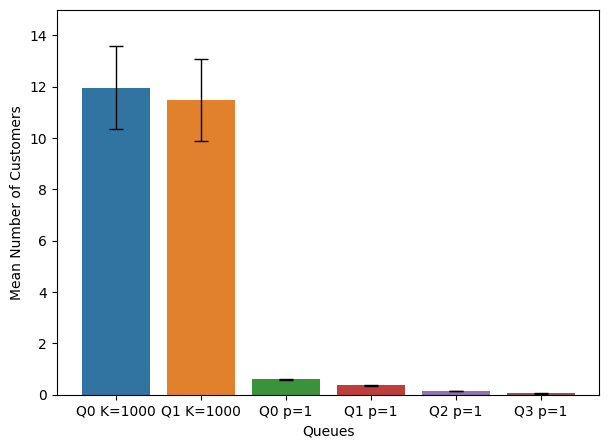

In [29]:
xk1000p1 = pd.DataFrame([
    ['Q0 K=1000', k1000_Qi["SuperMarket.checkout.queues[0]"].mean(), k1000_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Q1 K=1000', k1000_Qi["SuperMarket.checkout.queues[1]"].mean(), k1000_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Q0 p=1', p1_Qi["SuperMarket.checkout.queues[0]"].mean(), p1_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Q1 p=1', p1_Qi["SuperMarket.checkout.queues[1]"].mean(), p1_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Q2 p=1', p1_Qi["SuperMarket.checkout.queues[2]"].mean(), p1_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Q3 p=1', p1_Qi["SuperMarket.checkout.queues[3]"].mean(), p1_Qi["SuperMarket.checkout.queues[3]"].std()]
], columns=['Queues', 'Mean Number of Customers', 'SD'])

n_new = 100
ci_xk1000p1 = 1.96 * (xk1000p1['SD'] / (math.sqrt(n_new)))
dictionary2 = {"Q0 K=1000":ci_xk1000p1[0],
             "Q1 K=1000":ci_xk1000p1[1], 
             "Q0 p=1":ci_xk1000p1[2], 
             "Q1 p=1":ci_xk1000p1[3], 
             "Q2 p=1":ci_xk1000p1[4], 
             "Q3 p=1":ci_xk1000p1[5]
}

num_hues = len(np.unique(xk1000p1['Queues']))
plt.figure(figsize=(7, 5))
bx = sns.barplot(data=xk1000p1, x='Queues', y='Mean Number of Customers', hue='Queues')
bx.set_ylim(0, 15)
for (hue, df_hue), dogde_dist in zip(xk1000p1.groupby('Queues'), np.linspace(-0.4, 0.4, 2 * num_hues + 1)[1::2]):
    ci = dictionary2[hue]
    bars = bx.errorbar(data=df_hue, x='Queues', y='Mean Number of Customers', yerr=ci, ls='', lw=1, color='black', capsize=5)
    xys = bars.lines[0].get_xydata()
plt.show()

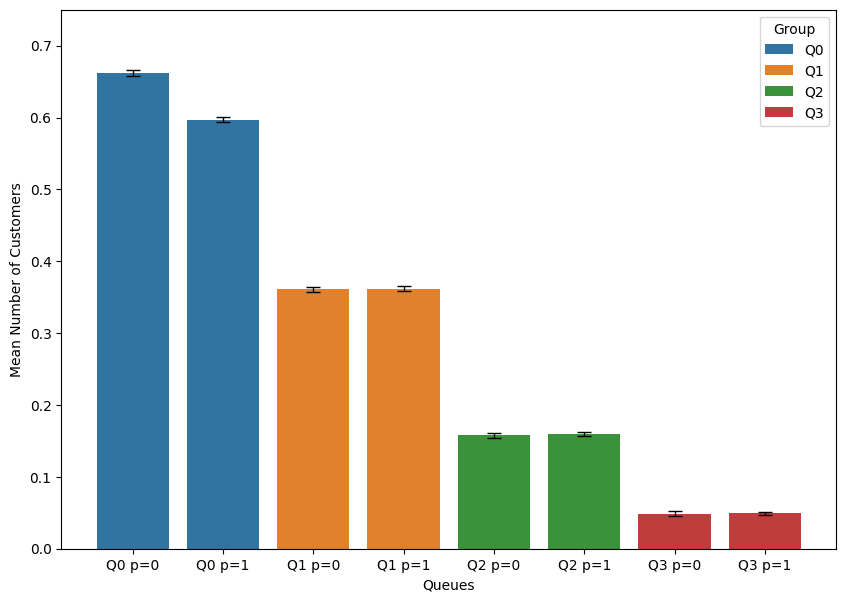

In [38]:
xcombined = pd.DataFrame([
    ['Q0', 'Q0 p=0', p0_Qi["SuperMarket.checkout.queues[0]"].mean(), p0_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Q0', 'Q0 p=1', p1_Qi["SuperMarket.checkout.queues[0]"].mean(), p1_Qi["SuperMarket.checkout.queues[0]"].std()],
    ['Q1', 'Q1 p=0', p0_Qi["SuperMarket.checkout.queues[1]"].mean(), p0_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Q1', 'Q1 p=1', p1_Qi["SuperMarket.checkout.queues[1]"].mean(), p1_Qi["SuperMarket.checkout.queues[1]"].std()],
    ['Q2', 'Q2 p=0', p0_Qi["SuperMarket.checkout.queues[2]"].mean(), p0_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Q2', 'Q2 p=1', p1_Qi["SuperMarket.checkout.queues[2]"].mean(), p1_Qi["SuperMarket.checkout.queues[2]"].std()],
    ['Q3', 'Q3 p=0', p0_Qi["SuperMarket.checkout.queues[3]"].mean(), p0_Qi["SuperMarket.checkout.queues[3]"].std()],
    ['Q3', 'Q3 p=1', p1_Qi["SuperMarket.checkout.queues[3]"].mean(), p1_Qi["SuperMarket.checkout.queues[3]"].std()]
], columns=["Group", 'Queues', 'Mean Number of Customers', 'SD'])

n_new = 100
ci_combined = 1.96 * (xcombined['SD'] / (math.sqrt(n_new)))
dictionary3 = {"Q0 p=0":ci_combined[0],
             "Q1 p=0":ci_combined[1], 
             "Q2 p=0":ci_combined[2], 
             "Q3 p=0":ci_combined[3], 
             "Q0 p=1":ci_combined[4], 
             "Q1 p=1":ci_combined[5], 
             "Q2 p=1":ci_combined[6], 
             "Q3 p=1":ci_combined[7], 
}

num_hues = len(np.unique(xcombined['Queues']))
plt.figure(figsize=(10, 7))
bx = sns.barplot(data=xcombined, x='Queues', y='Mean Number of Customers', hue='Group')
bx.set_ylim(0, 0.75)
for (hue, df_hue), dogde_dist in zip(xcombined.groupby('Queues'), np.linspace(-0.4, 0.4, 2 * num_hues + 1)[1::2]):
    ci = dictionary3[hue]
    bars = bx.errorbar(data=df_hue, x='Queues', y='Mean Number of Customers', yerr=ci, ls='', lw=1, color='black', capsize=5)
    xys = bars.lines[0].get_xydata()
plt.show()